# Jonathan Halverson
# Friday, January 5, 2017
# Aside on FFT applied to temperature data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

The records consist of the mean temperature in Boston for each week over a 30-week period (n_steps). The target is the mean temperature the week after the window or the 31st week. Our training data are intervals taken over a 5 year period or 261 weeks.

In [18]:
bos_wthr = pd.read_csv('../project_boston_restaurants/data/boston_weather_2015_2011.csv', parse_dates=['EST'])
bos_wthr.head(3).transpose()

,0,1,2
EST,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00
Max TemperatureF,33,41,37
Mean TemperatureF,28,36,30
Min TemperatureF,22,31,22
Max Dew PointF,16,17,36
MeanDew PointF,8,15,20
Min DewpointF,5,11,8
Max Humidity,53,53,100
Mean Humidity,43,45,72
Min Humidity,32,37,43


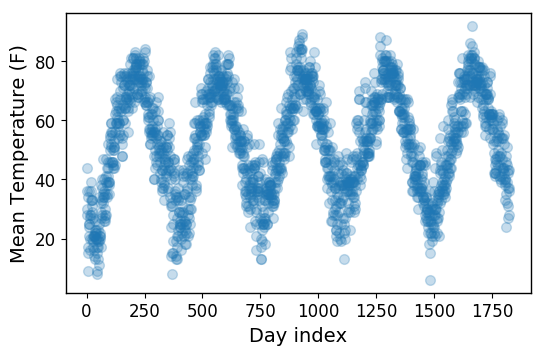

In [19]:
plt.scatter(bos_wthr.index, bos_wthr['Mean TemperatureF'], alpha=0.25)
plt.xlabel('Day index')
plt.ylabel('Mean Temperature (F)')

Let's create a simple ML regression model to predict temperature the next week based on the mean temperature the previous n weeks.

#### Aside on applying the FFT to the temperature data

Create a continuous function that mimics the data:

In [52]:
t = np.arange(bos_wthr.index.size)
syn = 45.0 * (np.sin(t/65.0) + 1.0)

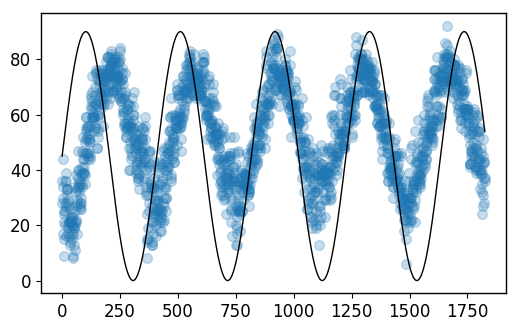

In [53]:
plt.scatter(bos_wthr.index, bos_wthr['Mean TemperatureF'], alpha=0.25)
plt.plot(t, syn, c='k')

In [54]:
Fs = 1.0 # one sample per week
T = 1.0 / Fs # one week per sample
L = 1826 # total number of samples
t = np.arange(0, L) * T

In [23]:
t[-5:]

array([ 1821.,  1822.,  1823.,  1824.,  1825.])

In [24]:
Y = np.fft.fft(bos_wthr['Mean TemperatureF'])
P2 = np.abs(Y / L)
P1 = P2[1:L/2+1]
P1 = 2.0 * P1[2:-1]

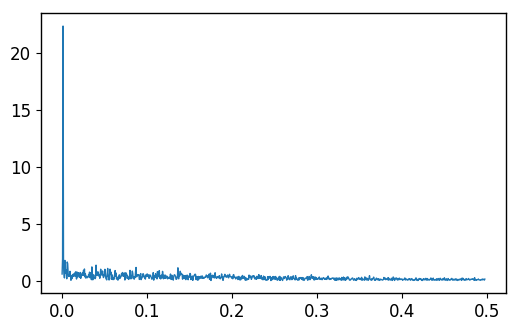

In [25]:
plt.plot(Fs * np.arange(0, (L/2)-3)/L, P1)

/Users/jhalverson/software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/Users/jhalverson/software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


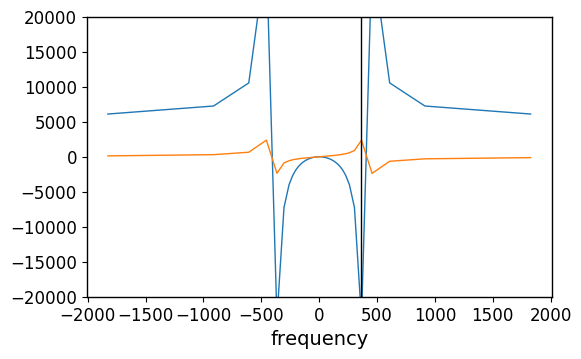

In [26]:
plt.plot(1/np.fft.fftfreq(t.size, d=1.0), np.fft.fft(syn).real)
plt.plot(1/np.fft.fftfreq(t.size, d=1.0), np.fft.fft(syn).imag)
plt.axvline(365.0, c='k')
plt.ylim(-20000, 20000)
#plt.xlim(0, 0.01)
plt.xlabel('frequency')

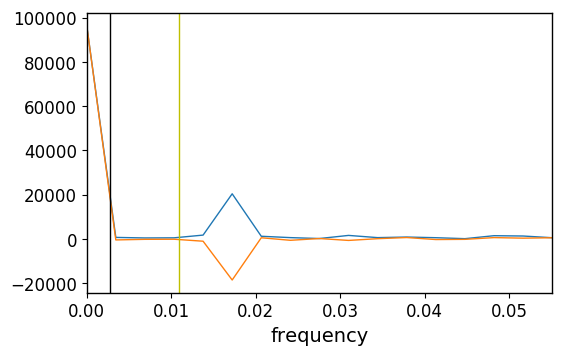

In [27]:
w = 2.0 * np.pi * np.arange(1826) / 1826.0
#plt.plot(np.fft.fftfreq(1826, d=1.0), np.fft.fft(bos_wthr['Mean TemperatureF']).real)
#plt.plot(np.fft.fftfreq(1826, d=1.0), np.fft.fft(bos_wthr['Mean TemperatureF']).imag)
plt.plot(w, np.abs(np.fft.fft(bos_wthr['Mean TemperatureF'])))
plt.plot(w, np.fft.fft(bos_wthr['Mean TemperatureF']).real)

plt.axvline(1.0 / 365.0, c='k')
plt.axvline(4.0 / 365.0, c='y')
#plt.ylim(-20000, 20000)
plt.xlim(0.0, 0.055)
plt.xlabel('frequency')

In [28]:
t = np.linspace(0, 0.5, num=500)
F = np.cos(20 * np.pi * t) + 2 * np.cos(40 * np.pi * t) + 3 * np.cos(60 * np.pi * t) + 4 * np.cos(80 * np.pi * t) + 5 * np.cos(100 * np.pi * t)

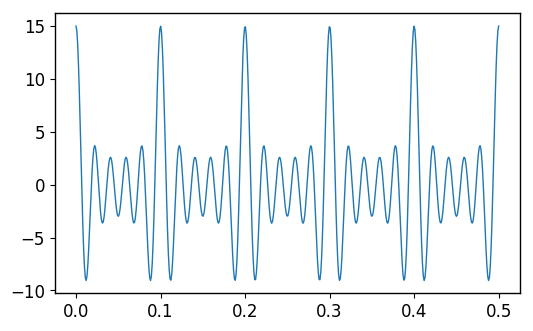

In [29]:
plt.plot(t, F)

/Users/jhalverson/software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


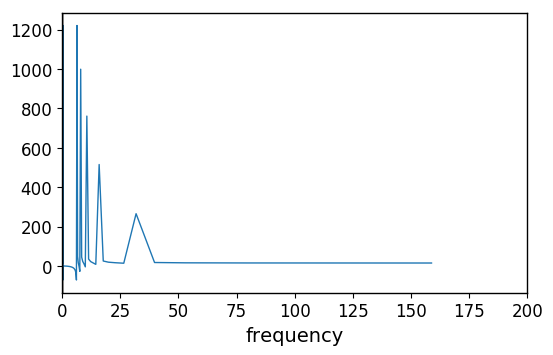

In [30]:
plt.plot(1/(2*np.pi*t), np.fft.fft(F).real)
#plt.plot(1/t, np.fft.fft(F).imag)
#plt.plot(1/t, np.abs(F))
plt.axvline(1.0 / 365.0, c='k')
plt.axvline(4.0 / 365.0, c='k')
#plt.ylim(-20000, 20000)
plt.xlim(0.0, 200)
plt.xlabel('frequency')

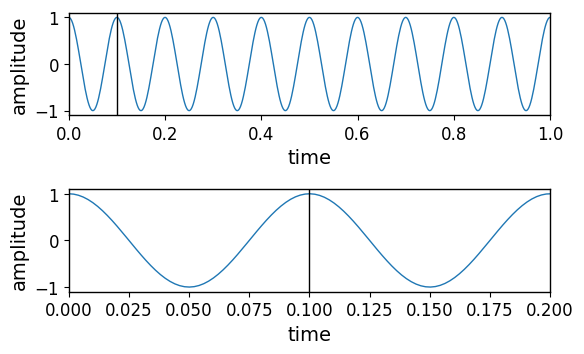

In [31]:
t_min, t_max = 0.0, 1.0
t = np.linspace(t_min, t_max, num=500)
y = np.cos(20 * np.pi * t)

plt.subplot(211)
plt.plot(t, y)
plt.xlim(0, 1.0)
plt.axvline(1.0 / 10, c='k')
plt.xlabel('time')
plt.ylabel('amplitude')

plt.subplot(212)
plt.plot(t, y)
plt.xlim(0, 0.2)
plt.axvline(1.0 / 10, c='k')
plt.xlabel('time')
plt.ylabel('amplitude')

plt.tight_layout()

The period is 0.1 so the frequency is 10.

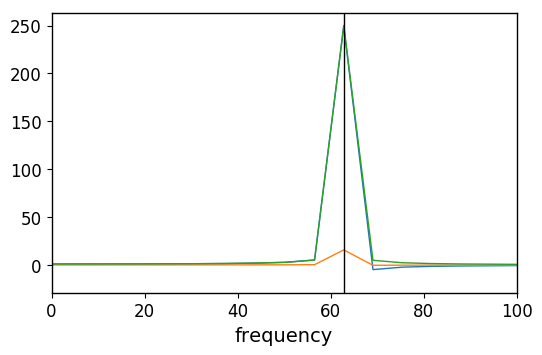

In [32]:
#plt.plot(np.arange(t.size) / (t.size * (t_max - t_min)), np.fft.fft(y).real)
#plt.plot(1/t, np.fft.fft(y).imag)
#plt.plot(1/t, np.abs(y))
w = 2.0 * np.pi * np.arange(t.size) / (t_max - t_min)
plt.plot(w, np.fft.fft(y).real)
plt.plot(w, np.fft.fft(y).imag)
plt.plot(w, np.abs(np.fft.fft(y)))

plt.axvline(20 * np.pi, c='k')
#plt.axvline(4.0 / 365.0, c='k')
#plt.ylim(-20000, 20000)
plt.xlim(0.0, 100)
plt.xlabel('frequency')

#### Frequency spectrum

In [33]:
bos_wthr.shape[0]

1826

In [34]:
bos_wthr.index.max()

1825

In [35]:
T = 1.0 * bos_wthr.index.max()
N = bos_wthr.shape[0] / 2 # half the total number of points
dx = pd.DataFrame({'k':range(0, 2 * N)})
dx['w'] = 2.0 * np.pi * dx.k / T
dx['t_k'] = dx.k * T / (2.0 * N)
dx['Temperature'] = 1.0 * bos_wthr['Mean TemperatureF'].copy()

In [36]:
dx.head()

,k,w,t_k,Temperature
0,0,0.000000,0.000000,28.0
1,1,0.003443,0.999452,36.0
2,2,0.006886,1.998905,30.0
3,3,0.010329,2.998357,44.0
4,4,0.013771,3.997809,34.0


In [37]:
dx.tail()

,k,w,t_k,Temperature
1821,1821,6.269414,1820.002738,43.0
1822,1822,6.272857,1821.002191,43.0
1823,1823,6.276300,1822.001643,28.0
1824,1824,6.279742,1823.001095,36.0
1825,1825,6.283185,1824.000548,37.0


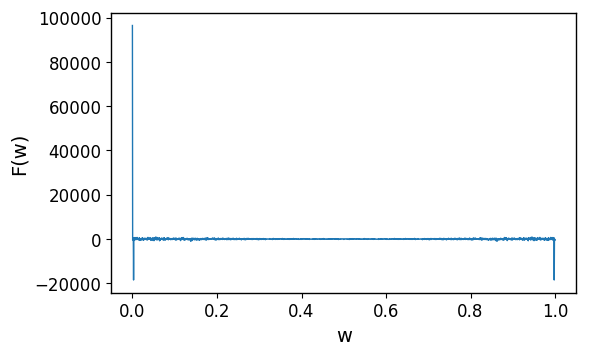

In [38]:
plt.plot(dx.w / (2 * np.pi), np.fft.fft(dx.Temperature).real)
#plt.xlim(80, 100)
plt.xlabel('w')
plt.ylabel('F(w)')

In [39]:
w = 0.0025
1/w/6.28, 365/4.0

(63.69426751592356, 91.25)

In [40]:
1/91.25

0.010958904109589041

In [41]:
1/w,6.28/w,1/w/6.28

(400.0, 2512.0, 63.69426751592356)

(0, 100)

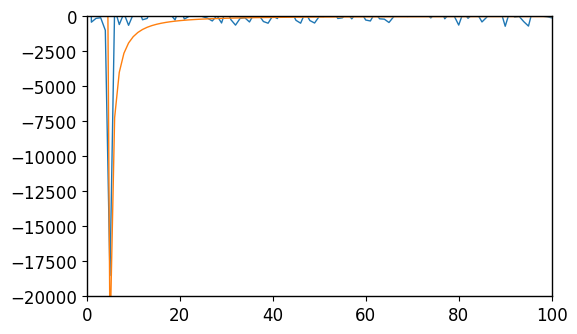

In [42]:
plt.plot(np.fft.fft(bos_wthr['Mean TemperatureF']).real)
plt.plot(np.fft.fft(syn).real)
plt.ylim(-20000, 0)
plt.xlim(0, 100)

In [43]:
N = dx.Temperature.index.size
Xk = []
for k in range(0, N):
     summ = 0.0 + 0.0j
     for n in range(0, N):
          summ += bos_wthr['Mean TemperatureF'][n] * np.exp(-1j * 2.0 * np.pi * k * n / float(N))
     Xk.append(summ)

In [44]:
Ak = np.fft.fft(bos_wthr['Mean TemperatureF'])
np.allclose(Xk, Ak)

True

In [45]:
np.allclose(np.fft.ifft(Ak), bos_wthr['Mean TemperatureF'])

True

In [46]:
Ak.real

array([ 96444.        ,   -417.71113508,   -145.13264544, ...,
         -100.53121032,   -145.13264544,   -417.71113508])

In [47]:
np.abs(Ak)

array([ 96444.        ,    719.33336   ,    475.0062396 , ...,
          532.54252986,    475.0062396 ,    719.33336   ])

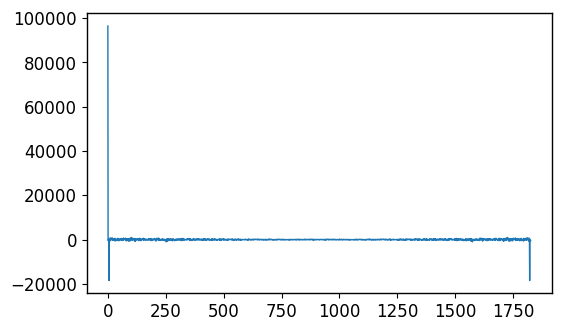

In [48]:
plt.plot([u.real for u in Xk])

In [49]:
Fw = []
for w in df.w:
     sumt = 0.0 + 0.0j
     for k in df.k:
          t_k = k * T / (2 * N)
          sumt += F(t_k) * np.exp(1j * w * t_k)
     Fw.append(sumt / 2.0 / N)

NameError: name 'df' is not defined